In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

control = pd.read_csv(r'C:\Users\chase\Anaconda3\Database_Dictionary\Thinkful_Bootcamp_Unit1\control_data_paymentclicks.csv')
test = pd.read_csv(r'C:\Users\chase\Anaconda3\Database_Dictionary\Thinkful_Bootcamp_Unit1\experiment_data_paymentclicks.csv')
test.dropna(inplace=True)
control.dropna(inplace=True)

## Dataset Description and Proposal:

##### The Problem:
Udacity offers a class on A/B testing, where students can take the class free for two weeks before they have to begin payments to continue their enrollment.  *Udacity wants to increase payments for their program*.

##### The Potential Solution:
A new, visually more appealing webpage will increase payments.

##### Method:
Implement 50% chance for someone to view the old webpage versus the new webpage.  Our primary metric will be payments, but we will also track clicks and enrollments as secondary metrics.  If payments are more than one standard deviation of the control in the test group after one month, the experiment is a success and we will roll out the new webpage 100%.  If payments are less than one standard deviation, we will continue tracking for one more week to see if payments increase and may have been time-sensitive.  

This dataset represents page views, clicks, enrollments, and payments for Udacity's A/B testing class.  The control is the old webpage and the test is a new webpage.    

In [3]:
test.set_index('Date')
control.set_index('Date')

,Day,Pageviews,Clicks,Enrollments,Payments
Date,,,,,
Oct 11,Sat,7723,687,134.0,70.0
Oct 12,Sun,9102,779,147.0,70.0
Oct 13,Mon,10511,909,167.0,95.0
Oct 14,Tue,9871,836,156.0,105.0
Oct 15,Wed,10014,837,163.0,64.0
Oct 16,Thu,9670,823,138.0,82.0
Oct 17,Fri,9008,748,146.0,76.0
Oct 18,Sat,7434,632,110.0,70.0
Oct 19,Sun,8459,691,131.0,60.0


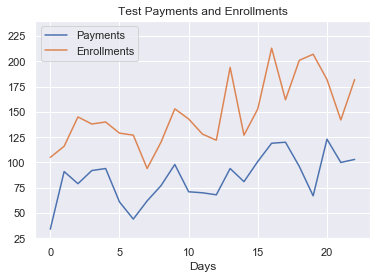

In [4]:
#Exploring the data:
sns.set()
sns.lineplot(data=test.Payments)
sns.lineplot(data=test.Enrollments)
plt.legend(['Payments', 'Enrollments'])
plt.title('Test Payments and Enrollments')
plt.xlabel('Days')
plt.ylim(25,240)
plt.show()

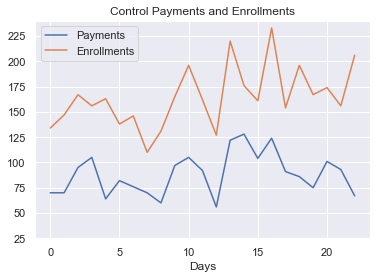

In [5]:
sns.set()
sns.lineplot(data=control.Payments)
sns.lineplot(data=control.Enrollments)
plt.legend(['Payments', 'Enrollments'])
plt.title('Control Payments and Enrollments')
plt.xlabel('Days')
plt.ylim(25,240)
plt.show()

Payments follow closely to the trend in Enrollments in the Test and the Control.  Evaluating for Pearson's correlation coefficient:

In [6]:
stats.pearsonr(test.Payments, test.Enrollments)
## Correlation coefficient is showing statistcal significance.  99% significant.  60% correlation.

(0.6024707489762654, 0.0023479471892214575)

In [14]:
stats.pearsonr(control.Payments, control.Enrollments)

(0.6345629909891899, 0.0011447175284746327)

In [7]:
#Comparing the total payment over enrollment rate for both the control and the test:
print('Total test payment vs enrollment rate:', test.Payments.sum()/test.Enrollments.sum())
print('Total control payment vs enrollment rate:', control.Payments.sum()/control.Enrollments.sum())

Total test payment vs enrollment rate: 0.5682150160677768
Total control payment vs enrollment rate: 0.537120211360634


The total test rate is faster than the total control rate, however they are not drastically different.  Plotting the histograms of the two populations, graphing the time series, and running a Mann-Whitney U test:

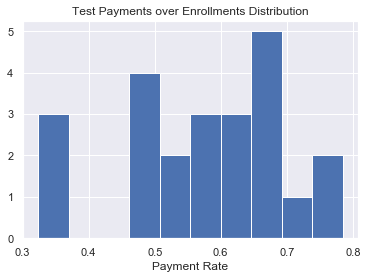

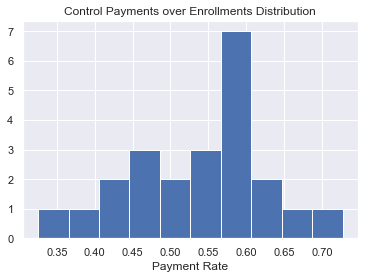

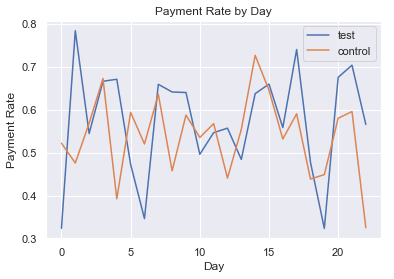

MannwhitneyuResult(statistic=209.0, pvalue=0.1134649963802109)

In [19]:
def payment_rate (x,y,z,v):
    # Running a Mann Whitney U test because the distributions of the Payment rate distributions are not normal.
    p = stats.mannwhitneyu(x[z]/x[v],y[z]/y[v])
    # Plotting the test payment distribution:
    plt.hist(x[z]/x[v])
    plt.title('Test Payments over Enrollments Distribution')
    plt.xlabel('Payment Rate')
    plt.show()
    # Plotting the control payment distribution:
    plt.hist(y[z]/y[v])
    plt.title('Control Payments over Enrollments Distribution')
    plt.xlabel('Payment Rate')
    plt.show()
    #Plotting the test and control rates on a times series plot:
    sns.lineplot(data=x[z]/x[v])
    sns.lineplot(data=y[z]/y[v])
    plt.legend(['test', 'control'])
    plt.title('Payment Rate by Day')
    plt.xlabel('Day')
    plt.ylabel('Payment Rate')
    plt.show()
    return p

payment_rate (test, control, 'Payments', 'Enrollments')

The payment rate distributions are not normal, therefore the Mann-Whitney U test was the proper statistical test to run to test the null hypothesis.  The p-value was greater than 0.05 and therefore there is not a statistically significant difference in the payment rate populations.  Digging deeper, a time series plotting the payment rate does not indicate any apparent differences between the populations.

Earlier the Pearson R coefficient indicated a 60% correlation with 99% significance between payments and enrollments in both the test and control groups.  Increasing enrollments directly correlates to increasing payments.  Let's try changing our metric and investigate enrollment rate: 

In [21]:
## Comparing the overall test enrollment rate vs control enrollment rate:
print('Total test enrollment vs pageviews rate:', test.Enrollments.sum()/test.Pageviews.sum())
print('Total control enrollment vs pageviews rate:', control.Enrollments.sum()/control.Pageviews.sum())

Total test enrollment vs pageviews rate: 0.016194964090044568
Total control enrollment vs pageviews rate: 0.01784005693735477


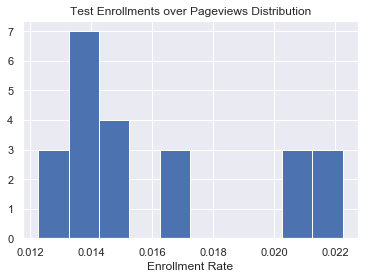

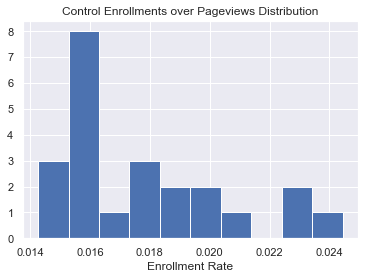

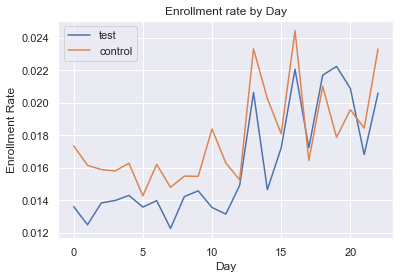

MannwhitneyuResult(statistic=158.0, pvalue=0.009936603713428378)

In [20]:
def enrollment_rate (x,y,z,v):
    # Running a Mann Whitney U test because the distributions of the Payment rate distributions are not normal.
    p = stats.mannwhitneyu(x[z]/x[v],y[z]/y[v])
    # Plotting the test payment distribution:
    plt.hist(x[z]/x[v])
    plt.title('Test Enrollments over Pageviews Distribution')
    plt.xlabel('Enrollment Rate')
    plt.show()
    # Plotting the control payment distribution:
    plt.hist(y[z]/y[v])
    plt.title('Control Enrollments over Pageviews Distribution')
    plt.xlabel('Enrollment Rate')
    plt.show()
    #Plotting the test and control rates on a times series plot:
    sns.lineplot(data=x[z]/x[v])
    sns.lineplot(data=y[z]/y[v])
    plt.legend(['test', 'control'])
    plt.title('Enrollment rate by Day')
    plt.xlabel('Day')
    plt.ylabel('Enrollment Rate')
    plt.show()
    return p

enrollment_rate (test, control, 'Enrollments', 'Pageviews')

The experiment begins with a gap between the control group and test group's enrollment rates before they begin merge.  Above we saw that the two groups' enrollment rates are statistically different from each other - and that there is a direct correlation between enrollments and payments.  

The Mann-Whitney U test run on the enrollment rate populations indicates the populations are different with 99% significance.  However, the overall enrollment rate is slightly greater in the control group.  Plotting the enrollment rate on a time series though, the test enrollment rate starts lower than the control before converging on the control group.  If it continues this trend the test enrollment rate will pass the control rate.    

I propose that the experiment should be continued for another month to see if this trend continues.  If we indeed continue to see enrollment rate increase in the test group, payments should follow suit due to our enrollment/payment correlation.  